In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error

Using TensorFlow backend.
/software/python3/3.6.5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/software/python3/3.6.5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/software/python3/3.6.5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/software/python3/3.6.5/lib/python3.6/site-packages/t

In [2]:
data = pd.read_csv('cleaned_covid_data.csv')
pd.set_option('display.max_columns', None)
US = data[(data['location'] == 'United States')]
US = US.drop(columns=['month','year','location','population','population_density','median_age','aged_65_older',\
                      'aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence',\
                     'female_smokers','male_smokers','hospital_beds_per_thousand','life_expectancy','human_development_index'])
US = US.drop(columns=['total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million',\
                     'new_vaccinations_smoothed_per_million','new_tests_smoothed_per_thousand'])
display(US)

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests_smoothed,new_vaccinations_smoothed,stringency_index
17247,2020-01-22,1.0,0.0,0.0,0.0,1.277872,607904.061224,46627.972727,0.0
17248,2020-01-23,1.0,0.0,0.0,0.0,1.332340,594714.081633,46499.296970,0.0
17249,2020-01-24,2.0,1.0,0.0,0.0,1.386809,581524.102041,46370.621212,0.0
17250,2020-01-25,2.0,0.0,0.0,0.0,1.441277,568334.122449,46241.945455,0.0
17251,2020-01-26,5.0,3.0,0.0,0.0,1.495745,555144.142857,46113.269697,0.0
...,...,...,...,...,...,...,...,...,...
18016,2022-03-01,79091361.0,47031.0,952423.0,1691.0,0.590000,927690.000000,264689.000000,58.8
18017,2022-03-02,79143716.0,52355.0,954518.0,2095.0,0.590000,927690.000000,250409.000000,58.8
18018,2022-03-03,79196008.0,52292.0,956261.0,1743.0,0.590000,927690.000000,228576.000000,58.8
18019,2022-03-04,79250509.0,54501.0,958144.0,1883.0,0.590000,927690.000000,180572.000000,58.8


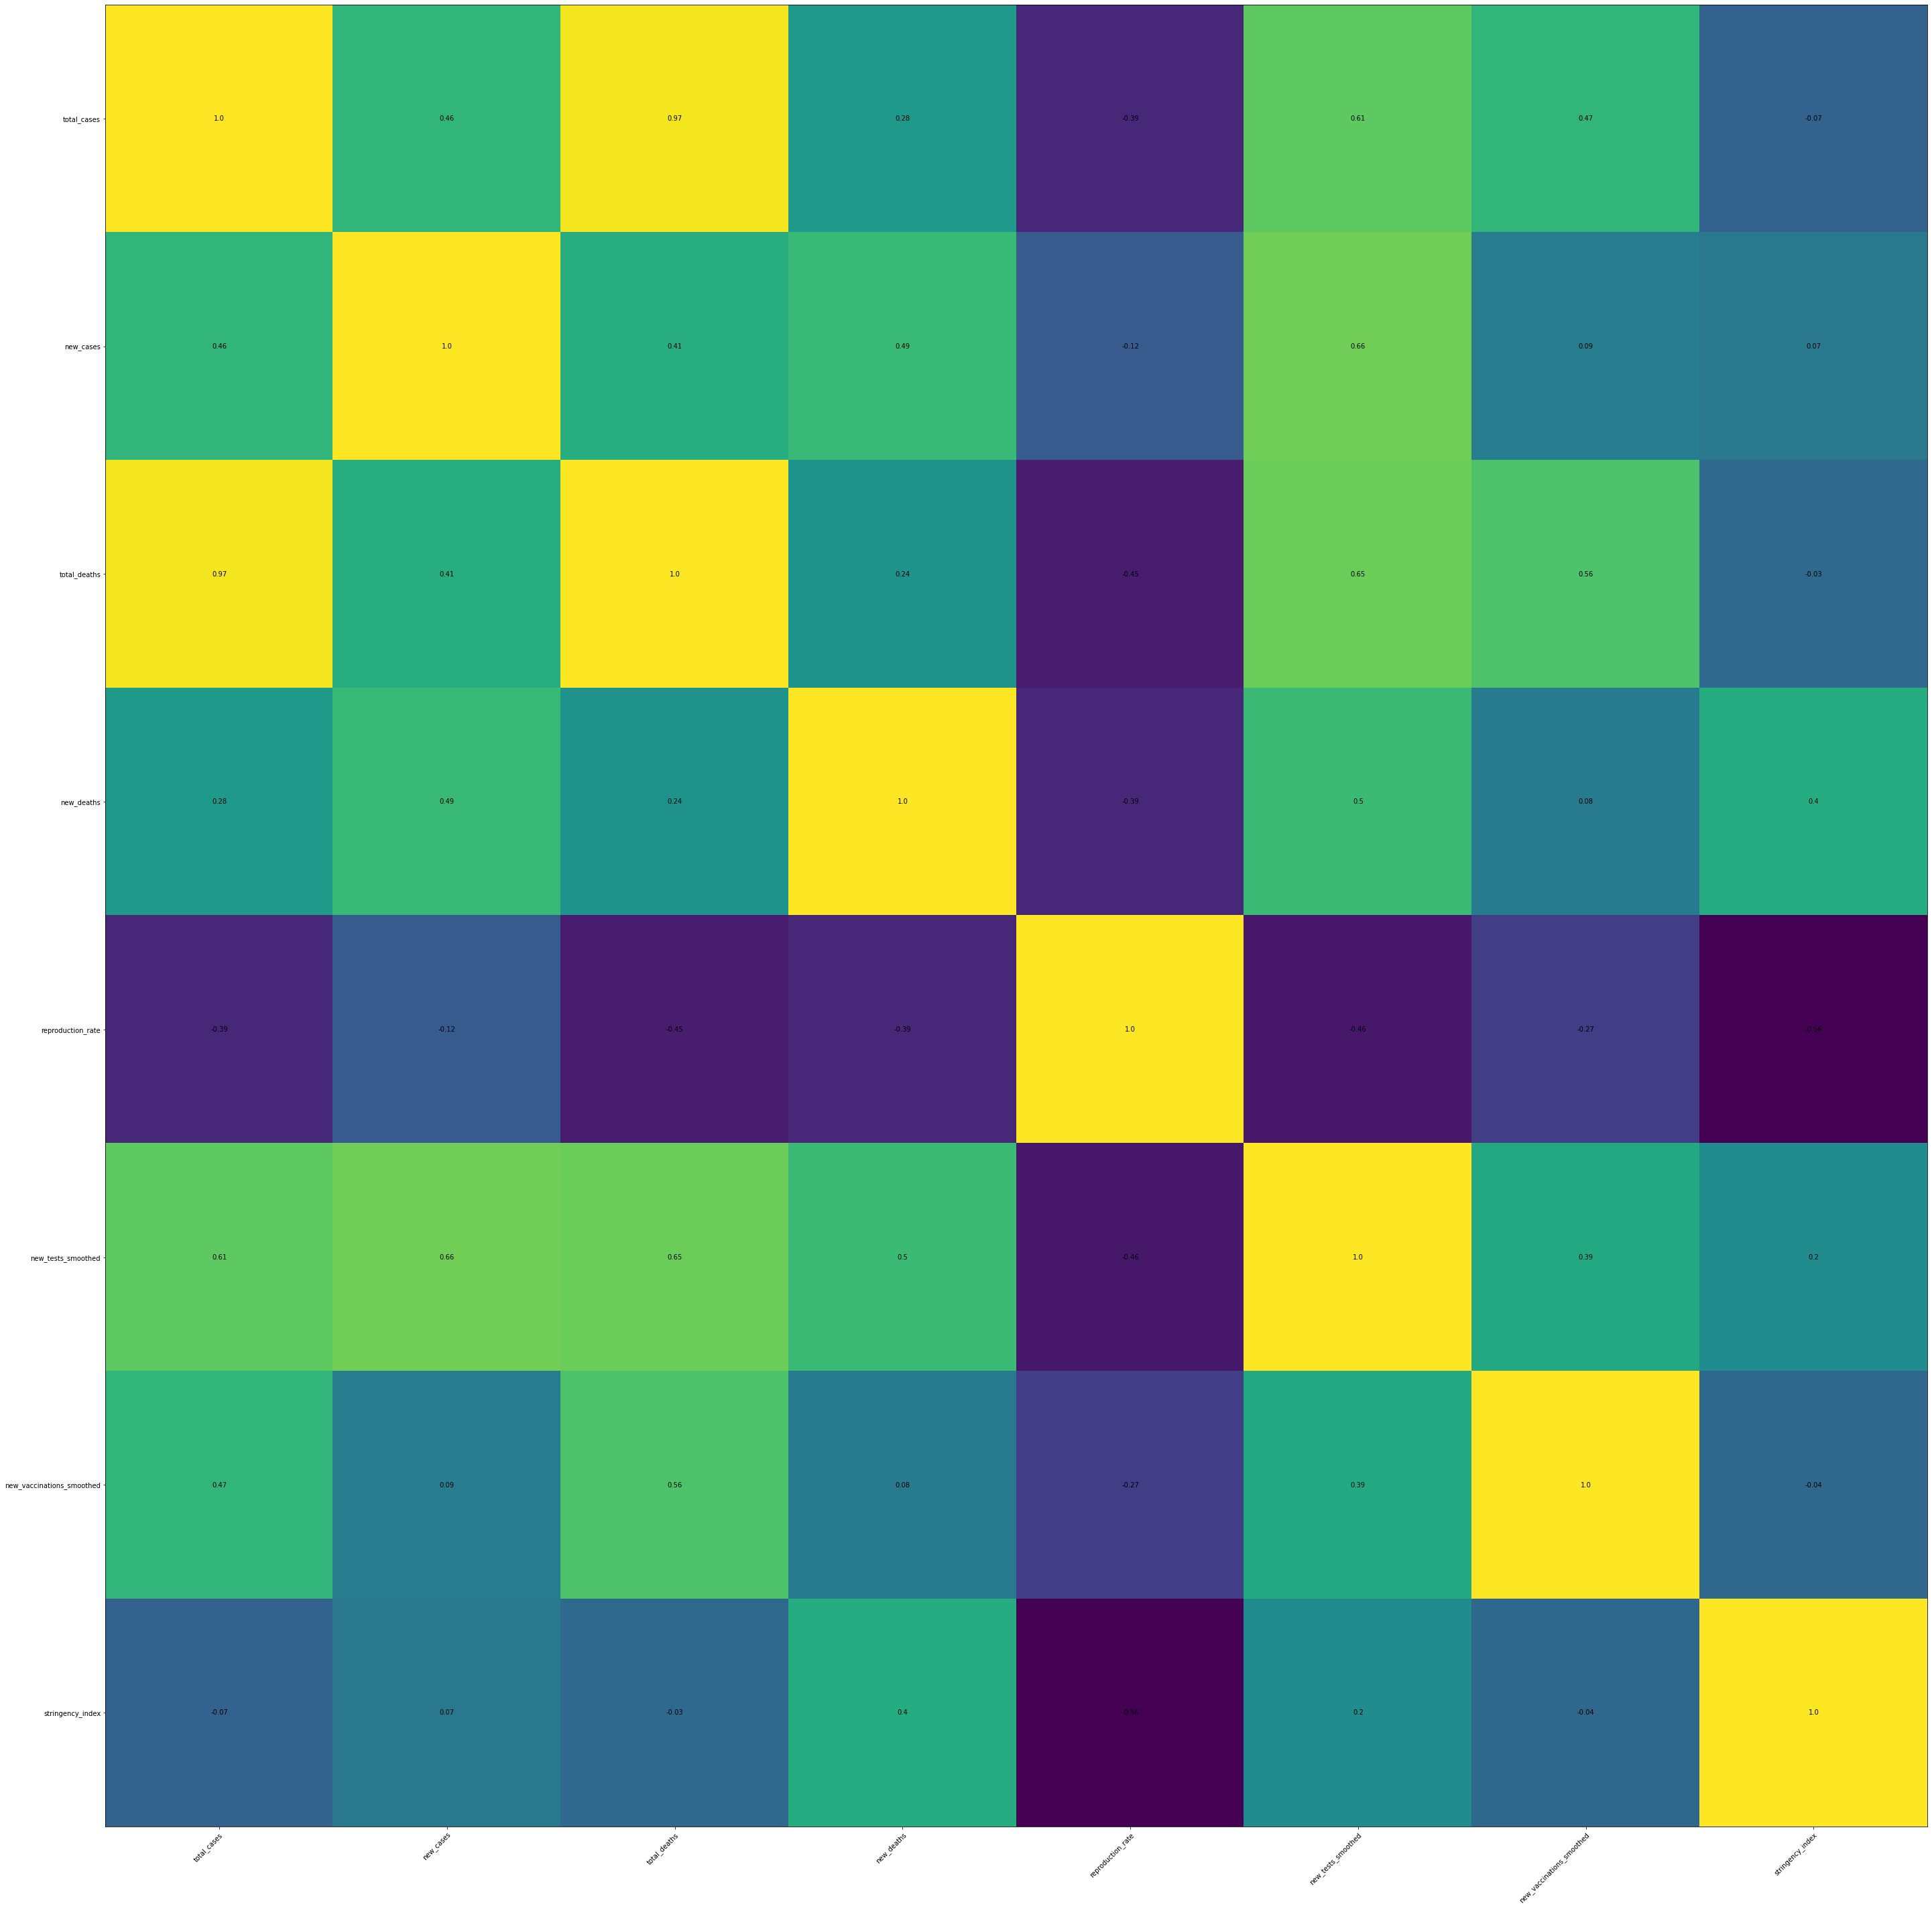

In [3]:
## Matplotlib heatmap of covid_data

# Create a correlation matrix for covid_data
corr = US.corr()

# Initialise figure
fig, ax = plt.subplots(figsize=(50,50))

# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2), ha="center", va="center", color="black")

In [4]:
pd.set_option('display.max_columns', None)
Italy = data[(data['location'] == 'Italy')]
Italy = Italy.drop(columns=['month','year','location','population','population_density','median_age','aged_65_older',\
                      'aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence',\
                     'female_smokers','male_smokers','hospital_beds_per_thousand','life_expectancy','human_development_index'])
Italy = Italy.drop(columns=['total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million',\
                     'new_vaccinations_smoothed_per_million','new_tests_smoothed_per_thousand'])
display(Italy)

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests_smoothed,new_vaccinations_smoothed,stringency_index
8255,2020-01-31,2.0,2.0,0.0,0.0,0.955714,59974.000000,1289.648649,19.44
8256,2020-02-01,2.0,0.0,0.0,0.0,1.064643,58127.000000,1290.297297,19.44
8257,2020-02-02,2.0,0.0,0.0,0.0,1.173571,56280.000000,1290.945946,19.44
8258,2020-02-03,2.0,0.0,0.0,0.0,1.282500,54433.000000,1291.594595,19.44
8259,2020-02-04,2.0,0.0,0.0,0.0,1.391429,52586.000000,1292.243243,19.44
...,...,...,...,...,...,...,...,...,...
9015,2022-03-01,12829972.0,47136.0,155000.0,233.0,0.760000,412189.000000,108220.000000,63.89
9016,2022-03-02,12867918.0,37946.0,155214.0,214.0,0.760000,403024.000000,102554.000000,63.89
9017,2022-03-03,12910506.0,42588.0,155399.0,185.0,0.779643,395421.000000,97967.000000,63.89
9018,2022-03-04,12948859.0,38353.0,155609.0,210.0,0.799286,388095.000000,92422.000000,63.89


In [5]:
pd.set_option('display.max_columns', None)
Malaysia = data[(data['location'] == 'Malaysia')]
Malaysia = Malaysia.drop(columns=['month','year','location','population','population_density','median_age','aged_65_older',\
                      'aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence',\
                     'female_smokers','male_smokers','hospital_beds_per_thousand','life_expectancy','human_development_index'])
Malaysia = Malaysia.drop(columns=['total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million',\
                     'new_vaccinations_smoothed_per_million','new_tests_smoothed_per_thousand'])
display(Malaysia)

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests_smoothed,new_vaccinations_smoothed,stringency_index
11236,2020-01-24,0.0,0.0,0.0,0.0,1.001200,1689.000000,766.724138,11.110000
11237,2020-01-25,4.0,4.0,0.0,0.0,1.024000,1453.000000,767.689655,11.110000
11238,2020-01-26,4.0,0.0,0.0,0.0,1.046800,1217.000000,768.655172,11.110000
11239,2020-01-27,4.0,0.0,0.0,0.0,1.069600,981.000000,769.620690,11.110000
11240,2020-01-28,4.0,0.0,0.0,0.0,1.092400,745.000000,770.586207,11.110000
...,...,...,...,...,...,...,...,...,...
12003,2022-03-01,3468590.0,25854.0,32827.0,78.0,1.130000,203985.000000,123607.000000,27.671538
12004,2022-03-02,3496090.0,27500.0,32942.0,115.0,1.130000,202622.852349,116844.000000,24.359231
12005,2022-03-03,3528557.0,32467.0,33028.0,86.0,1.106522,201260.704698,110809.000000,21.046923
12006,2022-03-04,3561766.0,33209.0,33106.0,78.0,1.083043,199898.557047,103323.000000,17.734615


In [6]:
pd.set_option('display.max_columns', None)
SKorea = data[(data['location'] == 'South Korea')]
SKorea = SKorea.drop(columns=['month','year','location','population','population_density','median_age','aged_65_older',\
                      'aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence',\
                     'female_smokers','male_smokers','hospital_beds_per_thousand','life_expectancy','human_development_index'])
SKorea = SKorea.drop(columns=['total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million',\
                     'new_vaccinations_smoothed_per_million','new_tests_smoothed_per_thousand'])
display(SKorea)

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests_smoothed,new_vaccinations_smoothed,stringency_index
14944,2020-01-22,1.0,0.0,0.0,0.0,1.472353,34747.857143,1011.506112,0.00
14945,2020-01-23,1.0,0.0,0.0,0.0,1.627941,33333.571429,1013.721271,0.00
14946,2020-01-24,2.0,1.0,0.0,0.0,1.783529,31919.285714,1015.936430,0.00
14947,2020-01-25,2.0,0.0,0.0,0.0,1.939118,30505.000000,1018.151589,0.00
14948,2020-01-26,3.0,1.0,0.0,0.0,2.094706,29090.714286,1020.366748,0.00
...,...,...,...,...,...,...,...,...,...
15713,2022-03-01,3492686.0,219237.0,8266.0,96.0,1.340000,511822.000000,119659.000000,40.74
15714,2022-03-02,3691488.0,198802.0,8394.0,128.0,1.310000,487465.000000,112865.000000,40.74
15715,2022-03-03,3958326.0,266838.0,8580.0,186.0,1.357714,498599.000000,99702.000000,40.74
15716,2022-03-04,4212652.0,254326.0,8796.0,216.0,1.405429,489437.000000,80109.000000,40.74


In [8]:
#Define a multivariate LSTM model
#Step one:
  #We will frame the supervised learning problem as predicting the [current cases] at the current day (t) 
  #given the [current cases] measurement and other values at the prior time step (t-1). So we need to make new
  #columns [var_n](t-1) which will be the predictor variables, and use to forecast the target variable at (t).
  #Then we can build the LSTM NN

In [7]:
#Make function to perform this transformation, and make it so it can add more time lags if you want, to test it out. 


def lagged_data(data, n):
   #target
  SKorea_lagged_X = data.shift() #Shift X data in the past by one
  if any(str.isdigit(x) for x in list(data.columns)[0]) == True:
    SKorea_lagged_X.columns = [(x[:-5] + '(t-' + str(n) + ')') for x in data.columns]
    
  else:
    SKorea_lagged_X.columns = [(x + '(t-' + str(n) + ')') for x in data.columns]

  return SKorea_lagged_X

In [8]:
def lag_n_data(data,target_column_name,n):
  y = pd.DataFrame(data[target_column_name])
  lagged = lagged_data(data, 1)
  for lagged_feature in lagged.columns:
      y[lagged_feature] = lagged[lagged_feature]
  for x in range(2,n+1):
    lagged = lagged_data(lagged,x)
    for lagged_feature in lagged.columns:
      y[lagged_feature] = lagged[lagged_feature]
  return y

In [11]:
#SKorea = SKorea.drop('date', axis = 1)

In [9]:

def lstm_model(dataset,n,target_string,n_features,batch_size,epochs,units):
#n = 1
    dates = dataset.date
    supervised_data = lag_n_data(dataset.drop("date", axis = 1), target_string, n)
    supervised_data = supervised_data.dropna()
    dates = dates[n:len(dates)]
    y_min = min(dataset[target_string])
    y_max = max(dataset[target_string])
    ##
    #Scale the supervised data:
    columns = supervised_data.columns
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_supervised_data = pd.DataFrame(scaler.fit_transform(supervised_data))
    scaled_supervised_data.columns = columns
    y = scaled_supervised_data.new_cases
    X = scaled_supervised_data.drop(target_string,axis = 1)

    #split into train and test sets

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = False)
    
    # reshape input to be 3D [#samples, #timesteps, #features]. This is the shape that is accepted by LSTM
    #n_features = 8
    X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], n, n_features))
    X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], n, n_features))
    
    #Build the neural network


    model = Sequential()
    model.add(LSTM(units, activation = 'tanh',return_sequences = True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(LSTM(units,return_sequences=False,activation='tanh'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
     
    model.compile(loss='mse', optimizer='adam')
    #Fit the model
    history = model.fit(X_train_reshaped, y_train, 
                                    epochs=epochs, 
                                    batch_size=batch_size, 
                                    validation_data=(X_test_reshaped, y_test), 
                                    verbose=2, shuffle=True)
    
    
                #make predictions
    y_pred = model.predict(X_test_reshaped)
    mse = mean_squared_error(y_pred,y_test)
    
    #rescaled_y_pred = [y*(y_max - y_min) + y_min for y in y_pred]
    #rescaled_y_test = [y*(y_max - y_min) + y_min for y in y_test]
    
    rescaled_y_pred = [((y + 1)*(y_max-y_min)/2) + y_min for y in y_pred]
    rescaled_y_test = [((y + 1)*(y_max-y_min)/2) + y_min for y in y_test]

   # models.append([mse,batch_size,epochs,units])
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()
    test_dates = dates[-len(y_test):]
    train_dates = dates[:len(y_train)]
    return [rescaled_y_pred,rescaled_y_test, pd.to_datetime(train_dates),pd.to_datetime(test_dates),model]

Train on 618 samples, validate on 155 samples
Epoch 1/100
 - 2s - loss: 0.7185 - val_loss: 0.2773
Epoch 2/100
 - 0s - loss: 0.0808 - val_loss: 0.0477
Epoch 3/100
 - 0s - loss: 0.0675 - val_loss: 0.0778
Epoch 4/100
 - 0s - loss: 0.0247 - val_loss: 0.1039
Epoch 5/100
 - 0s - loss: 0.0135 - val_loss: 0.0578
Epoch 6/100
 - 0s - loss: 0.0076 - val_loss: 0.0563
Epoch 7/100
 - 0s - loss: 0.0021 - val_loss: 0.0701
Epoch 8/100
 - 0s - loss: 0.0033 - val_loss: 0.0640
Epoch 9/100
 - 0s - loss: 0.0013 - val_loss: 0.0583
Epoch 10/100
 - 0s - loss: 0.0013 - val_loss: 0.0621
Epoch 11/100
 - 0s - loss: 9.9422e-04 - val_loss: 0.0614
Epoch 12/100
 - 0s - loss: 7.9526e-04 - val_loss: 0.0591
Epoch 13/100
 - 0s - loss: 7.5867e-04 - val_loss: 0.0602
Epoch 14/100
 - 0s - loss: 6.9658e-04 - val_loss: 0.0599
Epoch 15/100
 - 0s - loss: 6.3117e-04 - val_loss: 0.0590
Epoch 16/100
 - 0s - loss: 5.9802e-04 - val_loss: 0.0594
Epoch 17/100
 - 0s - loss: 5.6563e-04 - val_loss: 0.0590
Epoch 18/100
 - 0s - loss: 5.3687e

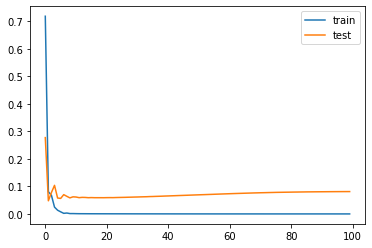

In [14]:
dataset = SKorea
n = 1
target_string = "new_cases"
n_features = 8
batch_size = 100
epochs = 100
units = 128
[y_pred, y_test, train_dates, test_dates, model] = lstm_model(dataset,n,target_string,n_features,batch_size,epochs,units)

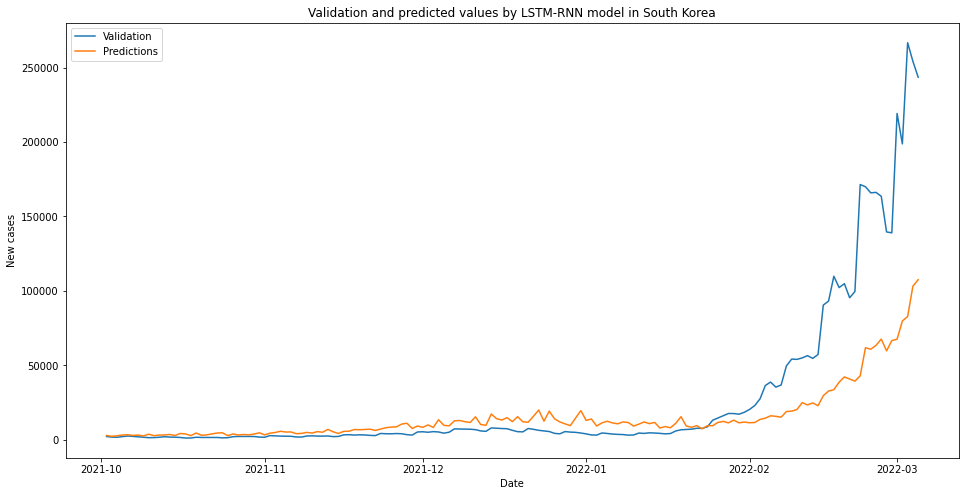

RMSLE validation set:  0.828


In [15]:
  #Plot the both curves:
test_mse = mean_squared_error(y_pred,y_test)
test_dates_dt = pd.to_datetime(test_dates)
output = pd.DataFrame()
output['y_test'] = y_test
output['y_pred'] = [x[0] for x in y_pred]
output.index = test_dates_dt
plt.figure(figsize=(16,8))
plt.title(f'Validation and predicted values by LSTM-RNN model in South Korea')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.plot(output[['y_test','y_pred']])
plt.legend(['Validation','Predictions'])
plt.show()
#print('RMSLE train set: ', np.round(np.sqrt(mean_squared_log_error(y_train, lstm_train_pred)),3))
print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(y_test, y_pred)),3))

Train on 616 samples, validate on 155 samples
Epoch 1/100
 - 2s - loss: 0.1881 - val_loss: 0.2049
Epoch 2/100
 - 0s - loss: 0.0282 - val_loss: 0.2035
Epoch 3/100
 - 0s - loss: 0.0089 - val_loss: 0.2174
Epoch 4/100
 - 0s - loss: 0.0051 - val_loss: 0.1995
Epoch 5/100
 - 0s - loss: 0.0042 - val_loss: 0.1933
Epoch 6/100
 - 0s - loss: 0.0039 - val_loss: 0.1768
Epoch 7/100
 - 0s - loss: 0.0036 - val_loss: 0.1614
Epoch 8/100
 - 0s - loss: 0.0034 - val_loss: 0.1491
Epoch 9/100
 - 0s - loss: 0.0032 - val_loss: 0.1346
Epoch 10/100
 - 0s - loss: 0.0029 - val_loss: 0.1250
Epoch 11/100
 - 0s - loss: 0.0027 - val_loss: 0.1112
Epoch 12/100
 - 0s - loss: 0.0025 - val_loss: 0.0970
Epoch 13/100
 - 0s - loss: 0.0023 - val_loss: 0.0855
Epoch 14/100
 - 0s - loss: 0.0022 - val_loss: 0.0763
Epoch 15/100
 - 0s - loss: 0.0020 - val_loss: 0.0663
Epoch 16/100
 - 0s - loss: 0.0019 - val_loss: 0.0600
Epoch 17/100
 - 0s - loss: 0.0018 - val_loss: 0.0529
Epoch 18/100
 - 0s - loss: 0.0017 - val_loss: 0.0497
Epoch 19/

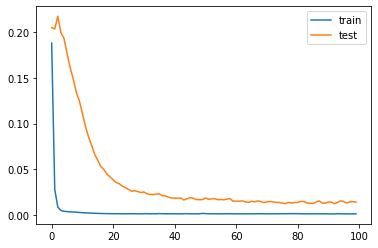

In [16]:
dataset = Malaysia
n = 1
target_string = "new_cases"
n_features = 8
batch_size = 28
epochs = 100
units = 128
[y_pred, y_test, train_dates, test_dates, model] = lstm_model(dataset,n,target_string,n_features,batch_size,epochs,units)

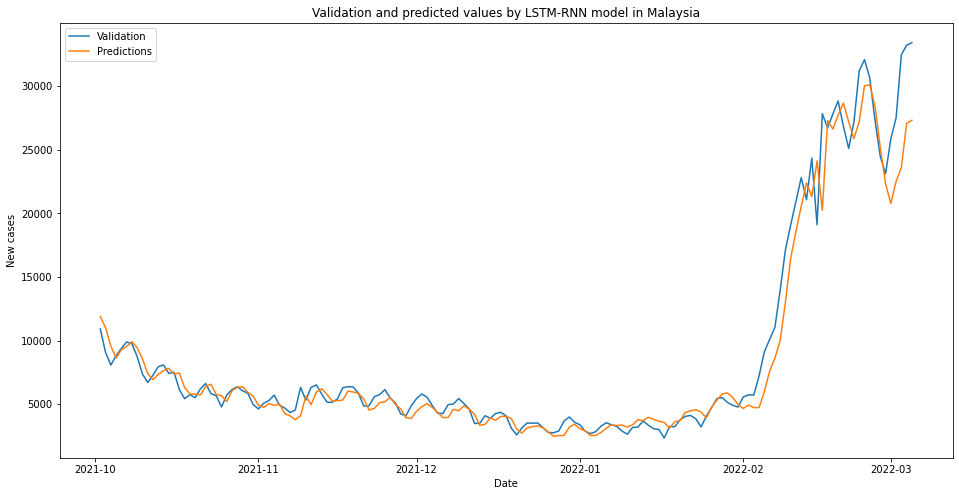

RMSLE validation set:  0.148


In [18]:
  #Plot the both curves:
test_mse = mean_squared_error(y_pred,y_test)
test_dates_dt = pd.to_datetime(test_dates)
output_mal = pd.DataFrame()
output_mal['y_test'] = y_test
output_mal['y_pred'] = [x[0] for x in y_pred]
output_mal.index = test_dates_dt
plt.figure(figsize=(16,8))
plt.title(f'Validation and predicted values by LSTM-RNN model in Malaysia')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.plot(output_mal[['y_test','y_pred']])
plt.legend(['Validation','Predictions'])
plt.show()
print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(y_test, y_pred)),3))

Train on 611 samples, validate on 153 samples
Epoch 1/50
 - 2s - loss: 0.3051 - val_loss: 0.1574
Epoch 2/50
 - 0s - loss: 0.0146 - val_loss: 0.2265
Epoch 3/50
 - 0s - loss: 0.0040 - val_loss: 0.2083
Epoch 4/50
 - 0s - loss: 0.0023 - val_loss: 0.2023
Epoch 5/50
 - 0s - loss: 0.0019 - val_loss: 0.1999
Epoch 6/50
 - 0s - loss: 0.0017 - val_loss: 0.1978
Epoch 7/50
 - 0s - loss: 0.0015 - val_loss: 0.1952
Epoch 8/50
 - 0s - loss: 0.0014 - val_loss: 0.1939
Epoch 9/50
 - 0s - loss: 0.0014 - val_loss: 0.1892
Epoch 10/50
 - 0s - loss: 0.0013 - val_loss: 0.1877
Epoch 11/50
 - 0s - loss: 0.0012 - val_loss: 0.1863
Epoch 12/50
 - 0s - loss: 0.0012 - val_loss: 0.1839
Epoch 13/50
 - 0s - loss: 0.0012 - val_loss: 0.1817
Epoch 14/50
 - 0s - loss: 0.0011 - val_loss: 0.1798
Epoch 15/50
 - 0s - loss: 0.0011 - val_loss: 0.1787
Epoch 16/50
 - 0s - loss: 0.0010 - val_loss: 0.1759
Epoch 17/50
 - 0s - loss: 0.0010 - val_loss: 0.1725
Epoch 18/50
 - 0s - loss: 9.5344e-04 - val_loss: 0.1746
Epoch 19/50
 - 0s - los

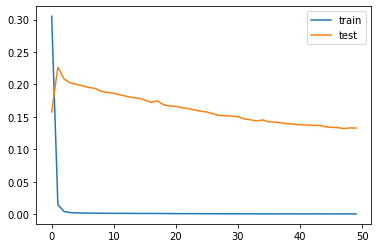

ValueError: too many values to unpack (expected 4)

In [12]:
dataset = Italy
n = 1
target_string = "new_cases"
n_features = 8
batch_size = 28
epochs = 50
units = 128
[y_pred, y_test, train_dates, test_dates, model] = lstm_model(dataset,n,target_string,n_features,batch_size,epochs,units)

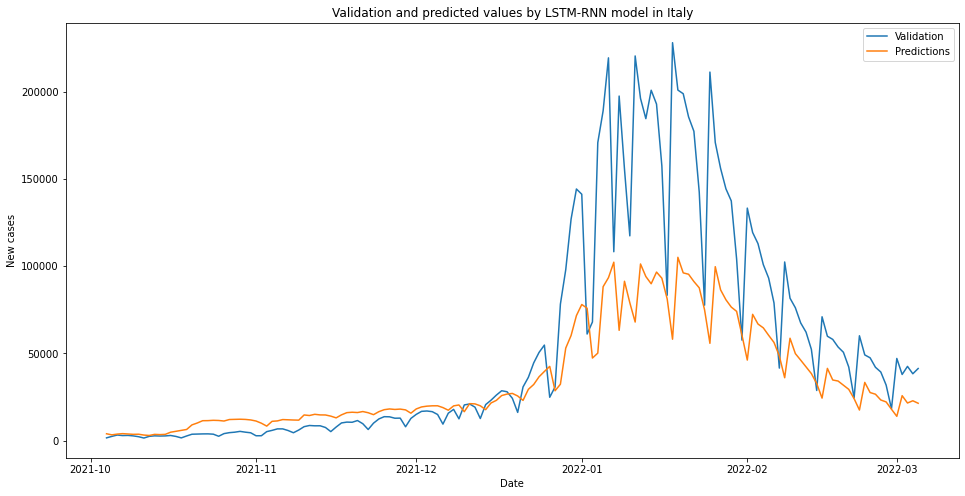

RMSLE validation set:  0.641


In [20]:
  #Plot the both curves:
test_mse = mean_squared_error(y_pred,y_test)
test_dates_dt = pd.to_datetime(test_dates)
output_mal = pd.DataFrame()
output_mal['y_test'] = y_test
output_mal['y_pred'] = [x[0] for x in y_pred]
output_mal.index = test_dates_dt
plt.figure(figsize=(16,8))
plt.title(f'Validation and predicted values by LSTM-RNN model in Italy')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.plot(output_mal[['y_test','y_pred']])
plt.legend(['Validation','Predictions'])
plt.show()
print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(y_test, y_pred)),3))

In [ ]:
dataset = US
n = 1
target_string = "new_cases"
n_features = 8
batch_size = 28
epochs = 50
units = 128
[y_pred, y_test, y_train_dates, y_test_dates, model] = lstm_model(dataset,n,target_string,n_features,batch_size,epochs,units)

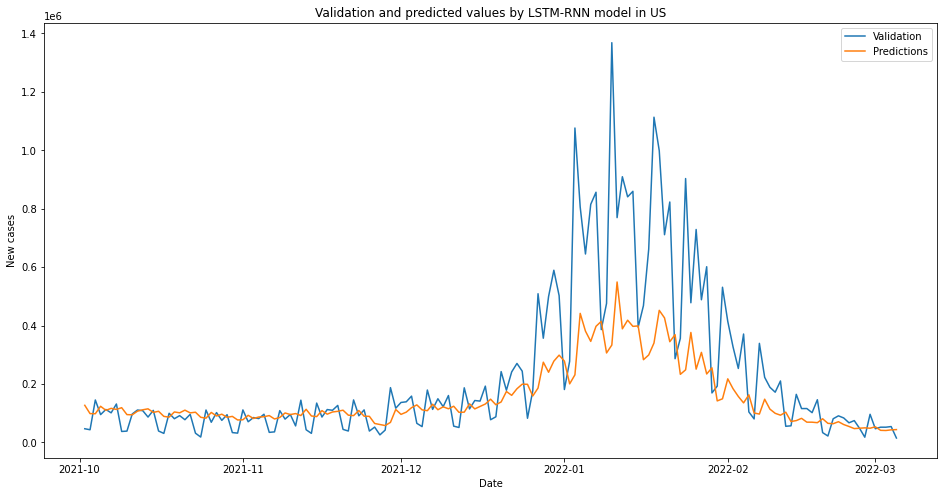

RMSLE validation set:  0.626


In [22]:
  #Plot the both curves:
test_mse = mean_squared_error(y_pred,y_test)
test_dates_dt = pd.to_datetime(test_dates)
output_mal = pd.DataFrame()
output_mal['y_test'] = y_test
output_mal['y_pred'] = [x[0] for x in y_pred]
output_mal.index = test_dates_dt
plt.figure(figsize=(16,8))
plt.title(f'Validation and predicted values by LSTM-RNN model in US')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.plot(output_mal[['y_test','y_pred']])
plt.legend(['Validation','Predictions'])
plt.show()
print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(y_test, y_pred)),3))

In [21]:
models = []
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
for batch_size in [23,64,100]:
    for epochs in [50,100]:
        for units in [128,246]:
            
                #Build the neural network


            model = Sequential()
            model.add(LSTM(units, activation = 'tanh',return_sequences = True,input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
            model.add(LSTM(units,return_sequences=False,activation='tanh'))
            model.add(Dense(1))
            model.compile(loss='mae', optimizer='adam')
            #Fit the model
            history = model.fit(X_train_reshaped, y_train, 
                                    epochs=epochs, 
                                    batch_size=batch_size, 
                                    validation_data=(X_test_reshaped, y_test), 
                                    verbose=2, shuffle=False)
                #make predictions
            y_pred = model.predict(X_test_reshaped)
            mse = (mean_squared_error(y_pred,y_test))
                    
            models.append([np.mean(mse),batch_size,epochs,units])
#            plt.plot(history.history['loss'], label='train')
#            plt.plot(history.history['val_loss'], label='test')
#            plt.legend()
#            plt.show()
models

Train on 516 samples, validate on 255 samples
Epoch 1/50
 - 1s - loss: 0.0332 - val_loss: 0.2583
Epoch 2/50
 - 0s - loss: 0.0578 - val_loss: 0.2475
Epoch 3/50
 - 0s - loss: 0.0329 - val_loss: 0.1843
Epoch 4/50
 - 0s - loss: 0.0337 - val_loss: 0.1652
Epoch 5/50
 - 0s - loss: 0.0178 - val_loss: 0.1568
Epoch 6/50
 - 0s - loss: 0.0145 - val_loss: 0.1515
Epoch 7/50
 - 0s - loss: 0.0144 - val_loss: 0.1463
Epoch 8/50
 - 0s - loss: 0.0132 - val_loss: 0.1424
Epoch 9/50
 - 0s - loss: 0.0118 - val_loss: 0.1376
Epoch 10/50
 - 0s - loss: 0.0117 - val_loss: 0.1350
Epoch 11/50
 - 0s - loss: 0.0122 - val_loss: 0.1300
Epoch 12/50
 - 0s - loss: 0.0118 - val_loss: 0.1296
Epoch 13/50
 - 0s - loss: 0.0173 - val_loss: 0.1222
Epoch 14/50
 - 0s - loss: 0.0125 - val_loss: 0.1205
Epoch 15/50
 - 0s - loss: 0.0191 - val_loss: 0.1201
Epoch 16/50
 - 0s - loss: 0.0115 - val_loss: 0.1113
Epoch 17/50
 - 0s - loss: 0.0102 - val_loss: 0.1061
Epoch 18/50
 - 0s - loss: 0.0090 - val_loss: 0.1008
Epoch 19/50
 - 0s - loss: 0

Epoch 56/100
 - 0s - loss: 0.0079 - val_loss: 0.0497
Epoch 57/100
 - 0s - loss: 0.0089 - val_loss: 0.0594
Epoch 58/100
 - 0s - loss: 0.0091 - val_loss: 0.0440
Epoch 59/100
 - 0s - loss: 0.0089 - val_loss: 0.0582
Epoch 60/100
 - 0s - loss: 0.0100 - val_loss: 0.0403
Epoch 61/100
 - 0s - loss: 0.0133 - val_loss: 0.0963
Epoch 62/100
 - 0s - loss: 0.0147 - val_loss: 0.0417
Epoch 63/100
 - 0s - loss: 0.0152 - val_loss: 0.0643
Epoch 64/100
 - 0s - loss: 0.0097 - val_loss: 0.0962
Epoch 65/100
 - 0s - loss: 0.0165 - val_loss: 0.0418
Epoch 66/100
 - 0s - loss: 0.0169 - val_loss: 0.0608
Epoch 67/100
 - 0s - loss: 0.0088 - val_loss: 0.0895
Epoch 68/100
 - 0s - loss: 0.0164 - val_loss: 0.0417
Epoch 69/100
 - 0s - loss: 0.0181 - val_loss: 0.0648
Epoch 70/100
 - 0s - loss: 0.0080 - val_loss: 0.0901
Epoch 71/100
 - 0s - loss: 0.0114 - val_loss: 0.0437
Epoch 72/100
 - 0s - loss: 0.0135 - val_loss: 0.0878
Epoch 73/100
 - 0s - loss: 0.0077 - val_loss: 0.0750
Epoch 74/100
 - 0s - loss: 0.0093 - val_loss: 

Epoch 10/50
 - 0s - loss: 0.0161 - val_loss: 0.1502
Epoch 11/50
 - 0s - loss: 0.0143 - val_loss: 0.1478
Epoch 12/50
 - 0s - loss: 0.0120 - val_loss: 0.1471
Epoch 13/50
 - 0s - loss: 0.0150 - val_loss: 0.1464
Epoch 14/50
 - 0s - loss: 0.0104 - val_loss: 0.1444
Epoch 15/50
 - 0s - loss: 0.0110 - val_loss: 0.1435
Epoch 16/50
 - 0s - loss: 0.0109 - val_loss: 0.1432
Epoch 17/50
 - 0s - loss: 0.0112 - val_loss: 0.1406
Epoch 18/50
 - 0s - loss: 0.0103 - val_loss: 0.1389
Epoch 19/50
 - 0s - loss: 0.0100 - val_loss: 0.1388
Epoch 20/50
 - 0s - loss: 0.0105 - val_loss: 0.1381
Epoch 21/50
 - 0s - loss: 0.0098 - val_loss: 0.1345
Epoch 22/50
 - 0s - loss: 0.0097 - val_loss: 0.1334
Epoch 23/50
 - 0s - loss: 0.0107 - val_loss: 0.1347
Epoch 24/50
 - 0s - loss: 0.0110 - val_loss: 0.1297
Epoch 25/50
 - 0s - loss: 0.0118 - val_loss: 0.1274
Epoch 26/50
 - 0s - loss: 0.0100 - val_loss: 0.1293
Epoch 27/50
 - 0s - loss: 0.0122 - val_loss: 0.1299
Epoch 28/50
 - 0s - loss: 0.0102 - val_loss: 0.1240
Epoch 29/50


Epoch 65/100
 - 0s - loss: 0.0088 - val_loss: 0.0701
Epoch 66/100
 - 0s - loss: 0.0081 - val_loss: 0.0769
Epoch 67/100
 - 0s - loss: 0.0094 - val_loss: 0.0719
Epoch 68/100
 - 0s - loss: 0.0102 - val_loss: 0.0685
Epoch 69/100
 - 0s - loss: 0.0085 - val_loss: 0.0769
Epoch 70/100
 - 0s - loss: 0.0083 - val_loss: 0.0695
Epoch 71/100
 - 0s - loss: 0.0078 - val_loss: 0.0649
Epoch 72/100
 - 0s - loss: 0.0081 - val_loss: 0.0730
Epoch 73/100
 - 0s - loss: 0.0099 - val_loss: 0.0779
Epoch 74/100
 - 0s - loss: 0.0080 - val_loss: 0.0623
Epoch 75/100
 - 0s - loss: 0.0079 - val_loss: 0.0645
Epoch 76/100
 - 0s - loss: 0.0076 - val_loss: 0.0695
Epoch 77/100
 - 0s - loss: 0.0076 - val_loss: 0.0601
Epoch 78/100
 - 0s - loss: 0.0106 - val_loss: 0.0584
Epoch 79/100
 - 0s - loss: 0.0078 - val_loss: 0.0714
Epoch 80/100
 - 0s - loss: 0.0078 - val_loss: 0.0586
Epoch 81/100
 - 0s - loss: 0.0096 - val_loss: 0.0567
Epoch 82/100
 - 0s - loss: 0.0077 - val_loss: 0.0662
Epoch 83/100
 - 0s - loss: 0.0089 - val_loss: 

Epoch 19/50
 - 0s - loss: 0.0108 - val_loss: 0.1353
Epoch 20/50
 - 0s - loss: 0.0125 - val_loss: 0.1349
Epoch 21/50
 - 0s - loss: 0.0114 - val_loss: 0.1339
Epoch 22/50
 - 0s - loss: 0.0100 - val_loss: 0.1326
Epoch 23/50
 - 0s - loss: 0.0099 - val_loss: 0.1308
Epoch 24/50
 - 0s - loss: 0.0104 - val_loss: 0.1296
Epoch 25/50
 - 0s - loss: 0.0098 - val_loss: 0.1282
Epoch 26/50
 - 0s - loss: 0.0116 - val_loss: 0.1272
Epoch 27/50
 - 0s - loss: 0.0106 - val_loss: 0.1261
Epoch 28/50
 - 0s - loss: 0.0112 - val_loss: 0.1250
Epoch 29/50
 - 0s - loss: 0.0102 - val_loss: 0.1242
Epoch 30/50
 - 0s - loss: 0.0099 - val_loss: 0.1219
Epoch 31/50
 - 0s - loss: 0.0093 - val_loss: 0.1205
Epoch 32/50
 - 0s - loss: 0.0114 - val_loss: 0.1192
Epoch 33/50
 - 0s - loss: 0.0099 - val_loss: 0.1191
Epoch 34/50
 - 0s - loss: 0.0108 - val_loss: 0.1172
Epoch 35/50
 - 0s - loss: 0.0099 - val_loss: 0.1162
Epoch 36/50
 - 0s - loss: 0.0099 - val_loss: 0.1140
Epoch 37/50
 - 0s - loss: 0.0087 - val_loss: 0.1132
Epoch 38/50


Epoch 74/100
 - 0s - loss: 0.0096 - val_loss: 0.0689
Epoch 75/100
 - 0s - loss: 0.0084 - val_loss: 0.0683
Epoch 76/100
 - 0s - loss: 0.0080 - val_loss: 0.0648
Epoch 77/100
 - 0s - loss: 0.0074 - val_loss: 0.0639
Epoch 78/100
 - 0s - loss: 0.0100 - val_loss: 0.0633
Epoch 79/100
 - 0s - loss: 0.0082 - val_loss: 0.0635
Epoch 80/100
 - 0s - loss: 0.0082 - val_loss: 0.0617
Epoch 81/100
 - 0s - loss: 0.0074 - val_loss: 0.0611
Epoch 82/100
 - 0s - loss: 0.0086 - val_loss: 0.0592
Epoch 83/100
 - 0s - loss: 0.0077 - val_loss: 0.0597
Epoch 84/100
 - 0s - loss: 0.0092 - val_loss: 0.0573
Epoch 85/100
 - 0s - loss: 0.0080 - val_loss: 0.0588
Epoch 86/100
 - 0s - loss: 0.0090 - val_loss: 0.0552
Epoch 87/100
 - 0s - loss: 0.0077 - val_loss: 0.0558
Epoch 88/100
 - 0s - loss: 0.0093 - val_loss: 0.0541
Epoch 89/100
 - 0s - loss: 0.0078 - val_loss: 0.0568
Epoch 90/100
 - 0s - loss: 0.0083 - val_loss: 0.0539
Epoch 91/100
 - 0s - loss: 0.0074 - val_loss: 0.0547
Epoch 92/100
 - 0s - loss: 0.0081 - val_loss: 

[]

Train on 615 samples, validate on 154 samples
Epoch 1/50
 - 7s - loss: 0.1466 - val_loss: 0.0666
Epoch 2/50
 - 0s - loss: 0.0077 - val_loss: 0.0769
Epoch 3/50
 - 0s - loss: 0.0037 - val_loss: 0.0707
Epoch 4/50
 - 0s - loss: 0.0028 - val_loss: 0.0678
Epoch 5/50
 - 0s - loss: 0.0027 - val_loss: 0.0671
Epoch 6/50
 - 0s - loss: 0.0027 - val_loss: 0.0635
Epoch 7/50
 - 0s - loss: 0.0025 - val_loss: 0.0634
Epoch 8/50
 - 0s - loss: 0.0024 - val_loss: 0.0604
Epoch 9/50
 - 0s - loss: 0.0022 - val_loss: 0.0598
Epoch 10/50
 - 0s - loss: 0.0022 - val_loss: 0.0575
Epoch 11/50
 - 0s - loss: 0.0021 - val_loss: 0.0561
Epoch 12/50
 - 0s - loss: 0.0020 - val_loss: 0.0545
Epoch 13/50
 - 0s - loss: 0.0020 - val_loss: 0.0539
Epoch 14/50
 - 0s - loss: 0.0019 - val_loss: 0.0536
Epoch 15/50
 - 0s - loss: 0.0019 - val_loss: 0.0529
Epoch 16/50
 - 0s - loss: 0.0019 - val_loss: 0.0522
Epoch 17/50
 - 0s - loss: 0.0019 - val_loss: 0.0522
Epoch 18/50
 - 0s - loss: 0.0019 - val_loss: 0.0518
Epoch 19/50
 - 0s - loss: 0

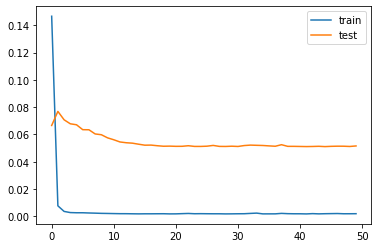

In [588]:
#make predictions on just univariate data:

dataset = US[["date","new_cases"]]
n = 5
target_string = "new_cases"
n_features = 1
batch_size = 28
epochs = 50
units = 128
[u_y_pred, u_y_test, u_train_dates, u_test_dates, u_model] = lstm_model(dataset,n,target_string,n_features,batch_size,epochs,units)

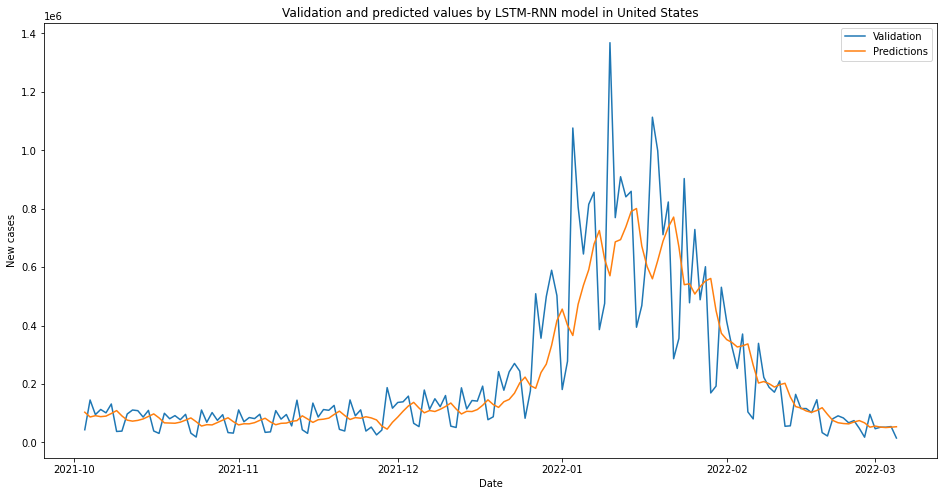

RMSLE validation set:  0.592


In [589]:
  #Plot the both curves:
test_mse = mean_squared_error(u_y_pred,u_y_test)
test_dates_dt = pd.to_datetime(u_test_dates)
output_mal = pd.DataFrame()
output_mal['y_test'] = u_y_test
output_mal['y_pred'] = [x[0] for x in u_y_pred]
output_mal.index = test_dates_dt
plt.figure(figsize=(16,8))
plt.title(f'Validation and predicted values by LSTM-RNN model in United States')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.plot(output_mal[['y_test','y_pred']])
plt.legend(['Validation','Predictions'])
plt.show()
print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(u_y_test, u_y_pred)),3))

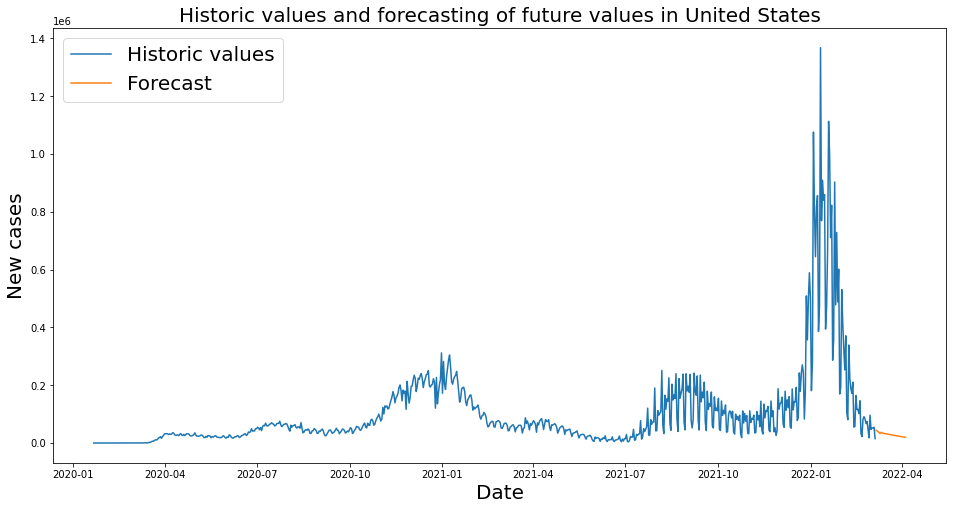

,new_cases
2020-01-22,0.000000
2020-01-23,0.000000
2020-01-24,1.000000
2020-01-25,0.000000
2020-01-26,3.000000
...,...
2022-03-31,22222.091163
2022-04-01,21636.120047
2022-04-02,21058.507715
2022-04-03,20486.073751


In [591]:
dates = pd.to_datetime(US.date)
future_values(u_model,US[["new_cases"]],30,"United States", dates)

Train on 608 samples, validate on 152 samples
Epoch 1/100
 - 7s - loss: 0.1238 - val_loss: 0.1037
Epoch 2/100
 - 0s - loss: 0.0060 - val_loss: 0.1081
Epoch 3/100
 - 0s - loss: 0.0018 - val_loss: 0.1013
Epoch 4/100
 - 0s - loss: 0.0012 - val_loss: 0.0992
Epoch 5/100
 - 0s - loss: 0.0011 - val_loss: 0.0962
Epoch 6/100
 - 0s - loss: 0.0010 - val_loss: 0.0937
Epoch 7/100
 - 0s - loss: 9.8792e-04 - val_loss: 0.0892
Epoch 8/100
 - 0s - loss: 9.4237e-04 - val_loss: 0.0862
Epoch 9/100
 - 0s - loss: 8.9468e-04 - val_loss: 0.0830
Epoch 10/100
 - 0s - loss: 8.4527e-04 - val_loss: 0.0804
Epoch 11/100
 - 0s - loss: 8.3738e-04 - val_loss: 0.0770
Epoch 12/100
 - 0s - loss: 7.5174e-04 - val_loss: 0.0746
Epoch 13/100
 - 0s - loss: 7.4003e-04 - val_loss: 0.0717
Epoch 14/100
 - 0s - loss: 7.0371e-04 - val_loss: 0.0696
Epoch 15/100
 - 0s - loss: 6.5472e-04 - val_loss: 0.0676
Epoch 16/100
 - 0s - loss: 6.1659e-04 - val_loss: 0.0653
Epoch 17/100
 - 0s - loss: 6.0502e-04 - val_loss: 0.0635
Epoch 18/100
 - 0s

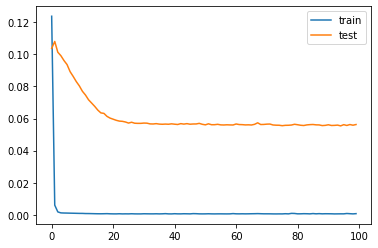

In [592]:
#make predictions on just univariate data:

dataset = Italy[["date","new_cases"]]
n = 5
target_string = "new_cases"
n_features = 1
batch_size = 28
epochs = 100
units = 128
[i_y_pred, i_y_test, i_train_dates, i_test_dates, i_model] = lstm_model(dataset,n,target_string,n_features,batch_size,epochs,units)

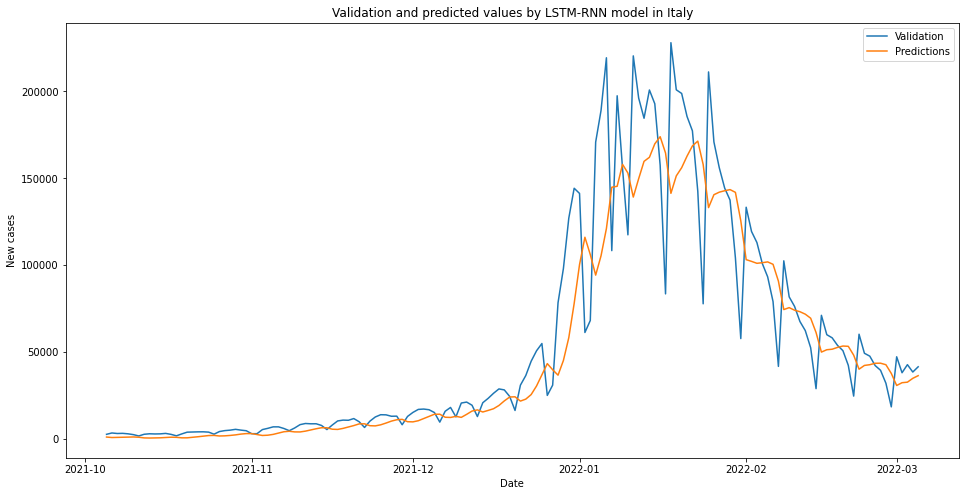

RMSLE validation set:  0.685


In [593]:
  #Plot the both curves:
test_mse = mean_squared_error(i_y_pred,i_y_test)
test_dates_dt = pd.to_datetime(i_test_dates)
output_mal = pd.DataFrame()
output_mal['y_test'] = i_y_test
output_mal['y_pred'] = [x[0] for x in i_y_pred]
output_mal.index = test_dates_dt
plt.figure(figsize=(16,8))
plt.title(f'Validation and predicted values by LSTM-RNN model in Italy')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.plot(output_mal[['y_test','y_pred']])
plt.legend(['Validation','Predictions'])
plt.show()
print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(i_y_test, i_y_pred)),3))

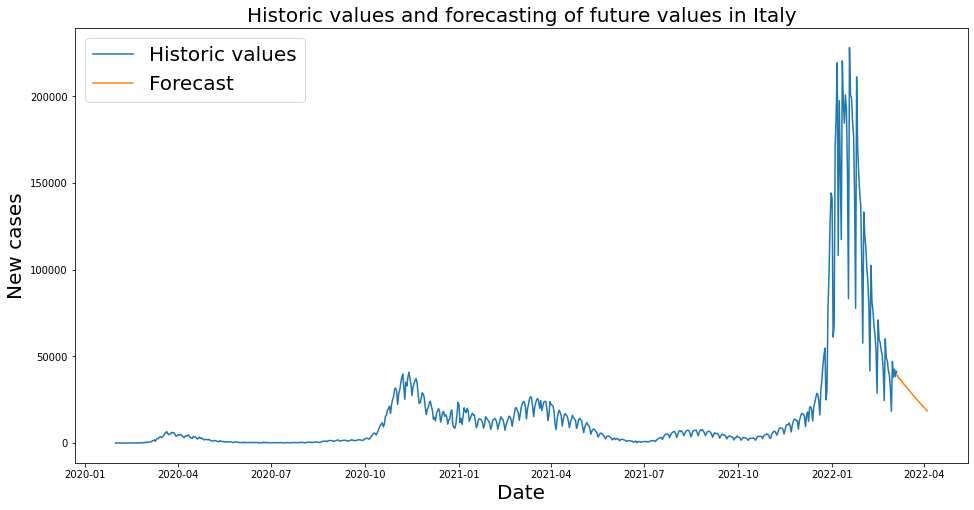

,new_cases
2020-01-31,2.000000
2020-02-01,0.000000
2020-02-02,0.000000
2020-02-03,0.000000
2020-02-04,0.000000
...,...
2022-03-31,21102.717095
2022-04-01,20456.755372
2022-04-02,19813.751037
2022-04-03,19174.254778


In [594]:
dates = pd.to_datetime(Italy.date)
future_values(i_model,Italy[["new_cases"]],30,"Italy", dates)

Train on 615 samples, validate on 154 samples
Epoch 1/15
 - 19s - loss: 0.4745 - val_loss: 0.0199
Epoch 2/15
 - 12s - loss: 0.0422 - val_loss: 0.0264
Epoch 3/15
 - 12s - loss: 0.0120 - val_loss: 0.0314
Epoch 4/15
 - 12s - loss: 0.0039 - val_loss: 0.0288
Epoch 5/15
 - 12s - loss: 0.0017 - val_loss: 0.0280
Epoch 6/15
 - 12s - loss: 5.1186e-04 - val_loss: 0.0288
Epoch 7/15
 - 12s - loss: 1.3507e-04 - val_loss: 0.0291
Epoch 8/15
 - 12s - loss: 4.2750e-05 - val_loss: 0.0291
Epoch 9/15
 - 12s - loss: 1.8091e-05 - val_loss: 0.0290
Epoch 10/15
 - 12s - loss: 7.6089e-06 - val_loss: 0.0289
Epoch 11/15
 - 12s - loss: 4.4520e-06 - val_loss: 0.0289
Epoch 12/15
 - 12s - loss: 3.0199e-06 - val_loss: 0.0288
Epoch 13/15
 - 12s - loss: 2.5757e-06 - val_loss: 0.0288
Epoch 14/15
 - 12s - loss: 2.4713e-06 - val_loss: 0.0288
Epoch 15/15
 - 12s - loss: 2.4333e-06 - val_loss: 0.0288


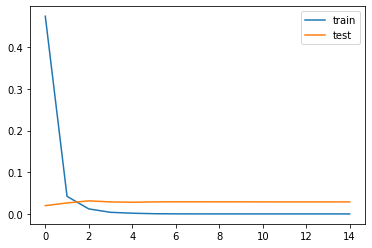

In [595]:
#make predictions on just univariate data:

dataset = SKorea[["date","new_cases"]]
n = 5
target_string = "new_cases"
n_features = 1
batch_size = 60
epochs = 15
units = 1028
[s_y_pred, s_y_test, s_train_dates, s_test_dates, s_model] = lstm_model(dataset,n,target_string,n_features,batch_size,epochs,units)

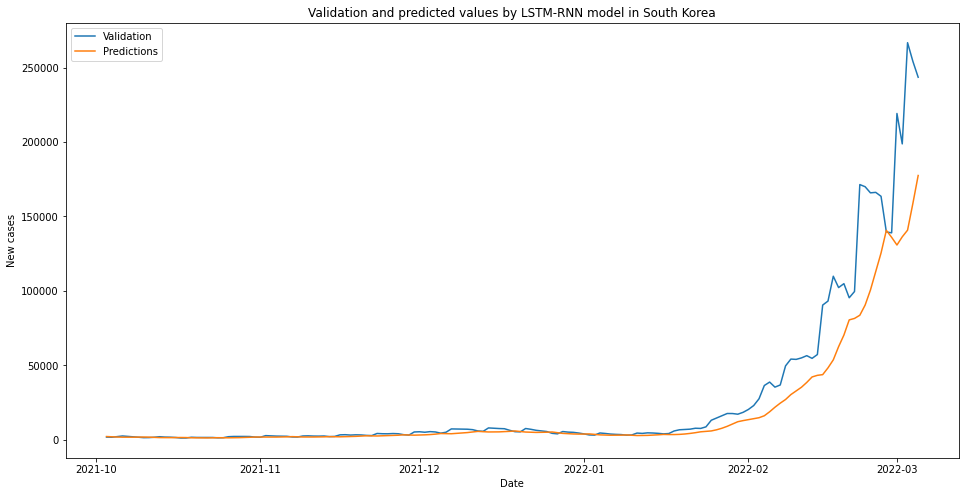

RMSLE validation set:  0.385


In [596]:
  #Plot the both curves:
test_mse = mean_squared_error(s_y_pred,s_y_test)
test_dates_dt = pd.to_datetime(s_test_dates)
output_mal = pd.DataFrame()
output_mal['y_test'] = s_y_test
output_mal['y_pred'] = [x[0] for x in s_y_pred]
output_mal.index = test_dates_dt
plt.figure(figsize=(16,8))
plt.title(f'Validation and predicted values by LSTM-RNN model in South Korea')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.plot(output_mal[['y_test','y_pred']])
plt.legend(['Validation','Predictions'])
plt.show()
print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(s_y_test, s_y_pred)),3))

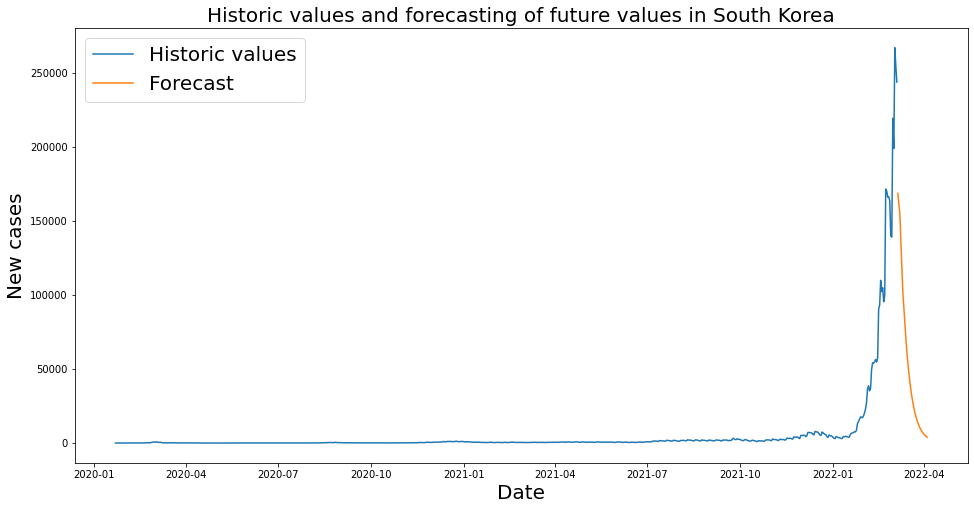

,new_cases
2020-01-22,0.000000
2020-01-23,0.000000
2020-01-24,1.000000
2020-01-25,0.000000
2020-01-26,1.000000
...,...
2022-03-31,6644.708697
2022-04-01,5798.955892
2022-04-02,5066.763246
2022-04-03,4433.227977


In [597]:
dates = pd.to_datetime(SKorea.date)
future_values(s_model,SKorea[["new_cases"]],30,"South Korea", dates)

Train on 613 samples, validate on 154 samples
Epoch 1/50
 - 5s - loss: 0.1096 - val_loss: 0.0436
Epoch 2/50
 - 0s - loss: 0.0101 - val_loss: 0.0261
Epoch 3/50
 - 0s - loss: 0.0032 - val_loss: 0.0152
Epoch 4/50
 - 0s - loss: 0.0023 - val_loss: 0.0139
Epoch 5/50
 - 0s - loss: 0.0022 - val_loss: 0.0146
Epoch 6/50
 - 0s - loss: 0.0022 - val_loss: 0.0148
Epoch 7/50
 - 0s - loss: 0.0022 - val_loss: 0.0147
Epoch 8/50
 - 0s - loss: 0.0022 - val_loss: 0.0147
Epoch 9/50
 - 0s - loss: 0.0023 - val_loss: 0.0153
Epoch 10/50
 - 0s - loss: 0.0022 - val_loss: 0.0147
Epoch 11/50
 - 0s - loss: 0.0022 - val_loss: 0.0146
Epoch 12/50
 - 0s - loss: 0.0022 - val_loss: 0.0149
Epoch 13/50
 - 0s - loss: 0.0022 - val_loss: 0.0146
Epoch 14/50
 - 0s - loss: 0.0022 - val_loss: 0.0147
Epoch 15/50
 - 0s - loss: 0.0021 - val_loss: 0.0149
Epoch 16/50
 - 0s - loss: 0.0022 - val_loss: 0.0144
Epoch 17/50
 - 0s - loss: 0.0022 - val_loss: 0.0150
Epoch 18/50
 - 0s - loss: 0.0022 - val_loss: 0.0144
Epoch 19/50
 - 0s - loss: 0

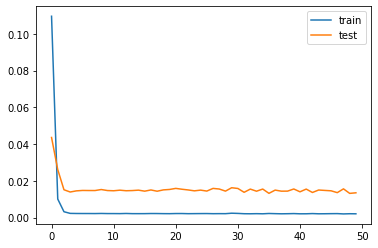

In [528]:
#make predictions on just univariate data:

dataset = Malaysia[["date","new_cases"]]
n = 5
target_string = "new_cases"
n_features = 1
batch_size = 28
epochs = 50
units = 128
[m_y_pred, m_y_test, m_train_dates, m_test_dates, m_model] = lstm_model(dataset,n,target_string,n_features,batch_size,epochs,units)

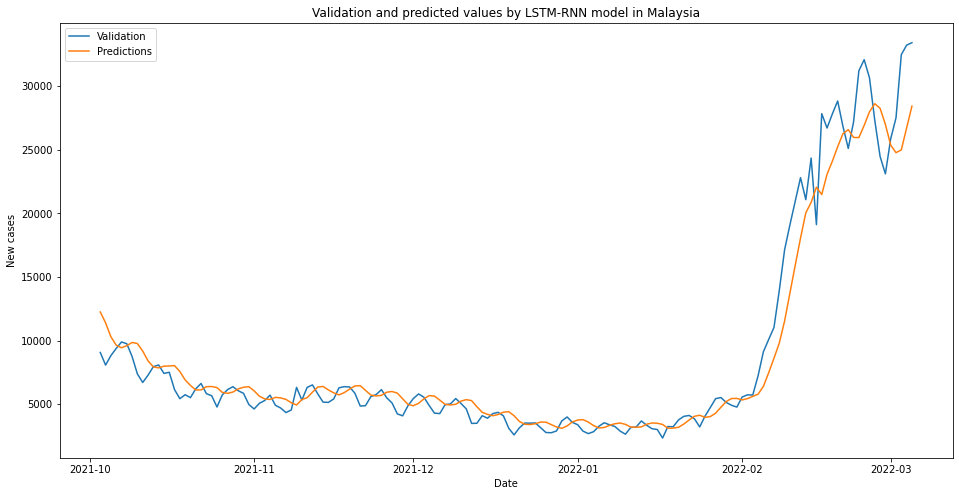

RMSLE validation set:  0.175


In [530]:
  #Plot the both curves:

test_mse = mean_squared_error(m_y_pred,m_y_test)
test_dates_dt = pd.to_datetime(m_test_dates)
output_mal = pd.DataFrame()
output_mal['y_test'] = m_y_test
output_mal['y_pred'] = m_y_pred
output_mal.index = test_dates_dt
plt.figure(figsize=(16,8))
plt.title(f'Validation and predicted values by LSTM-RNN model in Malaysia')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.plot(output_mal[['y_test','y_pred']])
plt.legend(['Validation','Predictions'])
plt.show()
print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(m_y_test, m_y_pred)),3))

In [ ]:
#Forecasting
#Need to feed predicted values back into the model in order to make forecast

    

In [586]:
def future_values(model, future_df, days, name_country, dates):
  #Loop for number of "days" to forecast:
    y_max = max(future_df.new_cases)
    y_min = min(future_df.new_cases)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    future_df = pd.DataFrame(scaler.fit_transform(future_df))
    future_df.columns = ["new_cases"]
    for i in range(1,days+1,1):
        #Take the last 10 days from the dataframe:
        #X_test = future_df
        
        last_10_days=future_df[-5:].values
        X_test=[]
        X_test.append(last_10_days)
        X_test=np.array(X_test)
        #Reshape properly to be used by the model:
        X_test=np.reshape(X_test, (X_test.shape[0], 5,1))
        
        
        #X_test = [x[0] for x in np.array(X_test)[-5:]]
        #X_test = np.array(X_test)
                                #Reshape properly to be used by the model:
        #X_test= np.reshape(X_test, (X_test.shape[0], 5,1))
        #Predict the one day in future given 10 days:
        pred_new_cases=model.predict(X_test)
        #Create the date for the forecasted value:
        #idx = pd.date_range(future_df.index[-1], periods=2, freq='D')[1:]
        #Append such value to the actual dataframe and use this new dataframe to compute a new future value:
        #future_df.loc( len(future_df) ) = [pred_new_cases[0][0]]
        #future_df=future_df.append(pd.Series(pred_new_cases[0][0]), ignore_index = True).copy()
        future_df=future_df.append({"new_cases": pred_new_cases[0][0]}, ignore_index = True).copy()
  
    #rescaled_y_forecast = [((y + 1)*(y_max-y_min)/2) + y_min for y in y_pred]
    rescaled_y_forecast = future_df.apply(lambda y: ((y + 1)*(y_max-y_min)/2) + y_min)
    rescaled_y_forecast.index = pd.date_range(min(dates), periods=len(rescaled_y_forecast), freq='D')
  #Plot the up to date values in blue and forecasted values in red:
    plt.figure(figsize=(16,8))
    plt.title(f'Historic values and forecasting of future values in {name_country}', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('New cases', fontsize=20)
    plt.plot(rescaled_y_forecast[:-days])
    plt.plot(rescaled_y_forecast[-days:])
    plt.legend(['Historic values','Forecast'], fontsize=20)
    plt.show()
 
 #Return the created dataframe including actual validation values and forecasted values.
    return rescaled_y_forecast

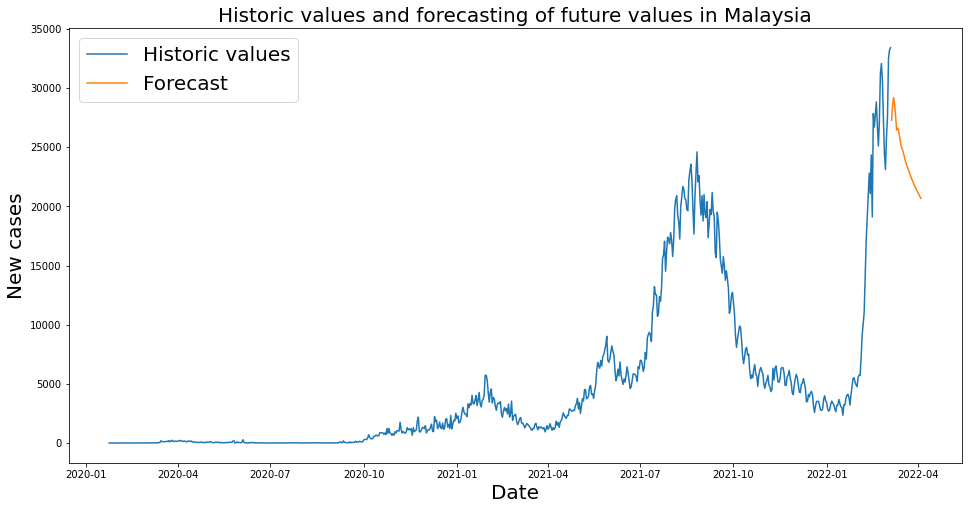

In [587]:
dates = pd.to_datetime(Malaysia.date)
ss = future_values(m_model,Malaysia[["new_cases"]],30,"Malaysia", dates)

In [583]:
ss

,new_cases
2020-01-24,0.000000
2020-01-25,4.000000
2020-01-26,0.000000
2020-01-27,0.000000
2020-01-28,0.000000
...,...
2022-03-31,21328.430447
2022-04-01,21155.480909
2022-04-02,20987.939840
2022-04-03,20827.695350


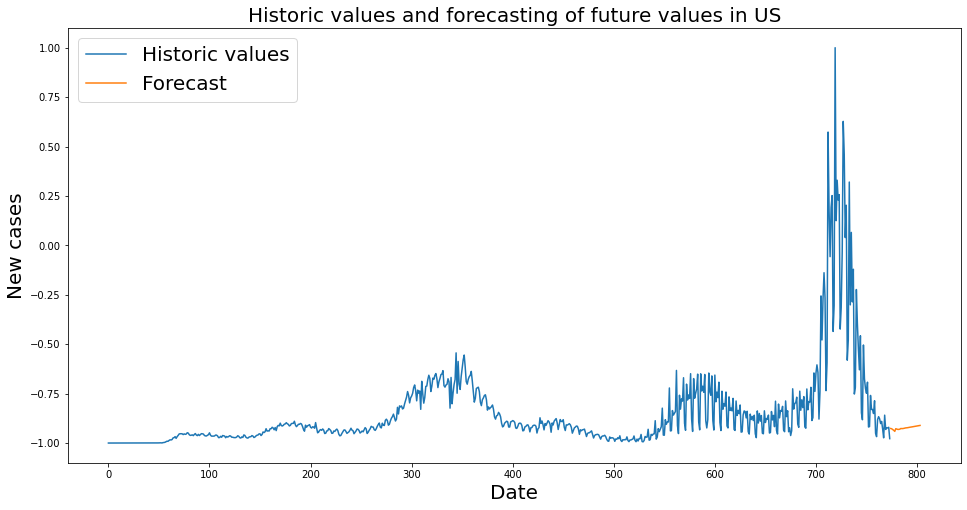

,new_cases
0,-1.000000
1,-1.000000
2,-0.999999
3,-1.000000
4,-0.999996
...,...
799,-0.914655
800,-0.913753
801,-0.912807
802,-0.911864


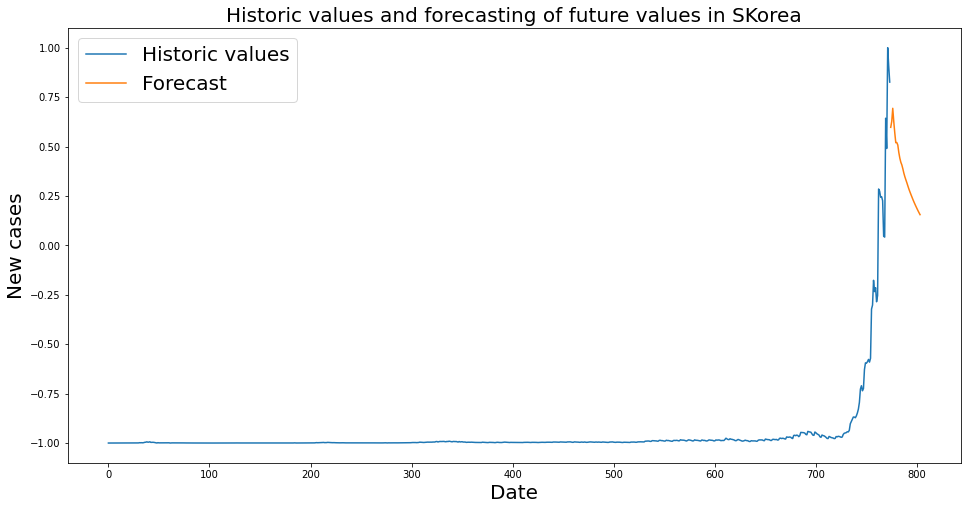

,new_cases
0,-1.000000
1,-1.000000
2,-0.999993
3,-1.000000
4,-0.999993
...,...
799,0.196466
800,0.185599
801,0.175088
802,0.165007


In [525]:
future_values(model,SKorea[["new_cases"]],30,"SKorea")


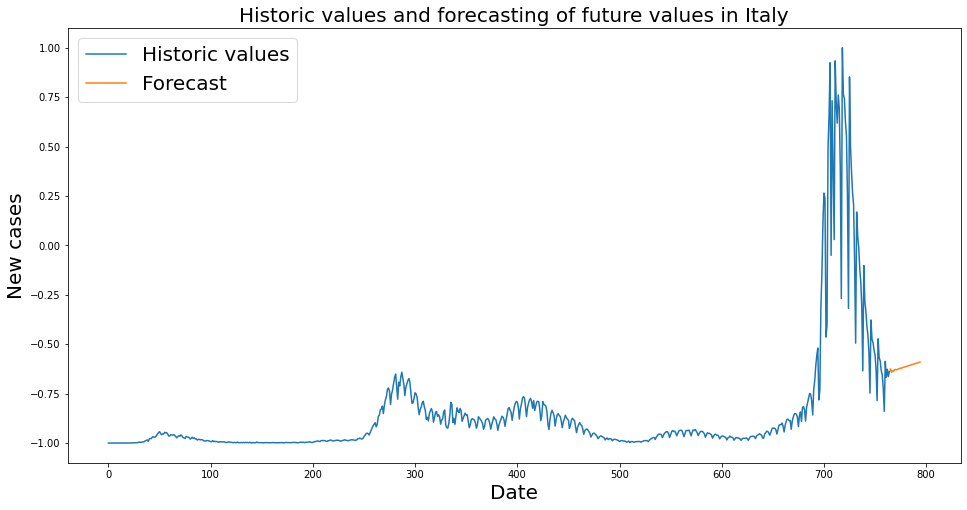

,new_cases
0,-0.999982
1,-1.000000
2,-1.000000
3,-1.000000
4,-1.000000
...,...
790,-0.597097
791,-0.595453
792,-0.593816
793,-0.592193


In [527]:
future_values(model,Italy[["new_cases"]],30,"Italy")
